In [1]:
from analysis.utils import *
from analysis.probabilities import *
from datetime import datetime
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
import numpy as np

In [2]:
apple = 'AAPL'
microsoft = 'MSFT'
google = 'GOOG'

tickers = [apple, microsoft, google]
# start_date = datetime(2015, 10, 15)
# end_date = datetimte(2023, 10, 15)
# download_tickers(tickers, start_date, end_date)

apple_df = pd.read_csv(f'data/{apple}.csv')
microsoft_df = pd.read_csv(f'data/{microsoft}.csv')
google_df = pd.read_csv(f'data/{google}.csv')

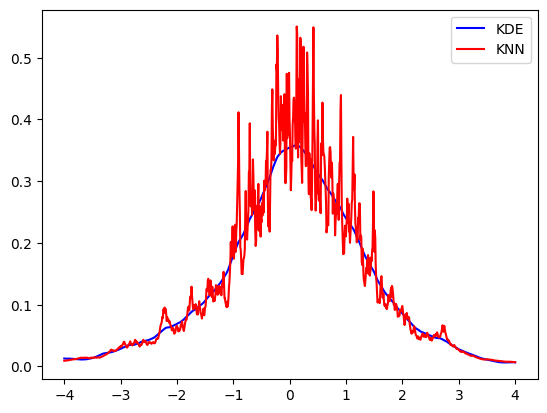

In [3]:
# test of density for one random variable
returns = np.array([apple_df['Returns']]).transpose()

# bandwidth = 'silverman' | 'scott' | float
kde = KDE(kernel='exponential', bandwidth='silverman')
knn = KNN()

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

# print density distributions
x_vals = np.linspace(-4, 4, 1000)
y_knn = [pdf_knn(x) for x in x_vals]
y_kde = [pdf_kde(x) for x in x_vals]


plt.plot(x_vals, y_kde, label='KDE', color='blue')
plt.plot(x_vals, y_knn, label='KNN', color='red')
plt.legend()
plt.show()

In [4]:
# test of density for multiple random variable
returns = np.array([apple_df['Returns'], google_df['Returns']]).transpose()

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

print(pdf_kde(2, 2))
print(pdf_knn(2, 2))

0.021776722525108032
0.021418614971167288


In [5]:
# test of conditional density
joint = np.array([apple_df['Returns']]).transpose()
cond = np.array([google_df['Returns']]).transpose()

pdf_kde = pdf(kde, joint, cond)
pdf_knn = pdf(knn, joint, cond)

print(pdf_kde(2, 2))
print(pdf_knn(2, 2))

0.24477075851600108
0.2591939473509528
